<a href="https://colab.research.google.com/github/singhabijeet83/OIBSIP/blob/main/oasis2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
df1 =pd.read_csv('/content/Unemployment in India.csv')
df =pd.read_csv("/content/Unemployment_Rate_upto_11_2020.csv")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [ ]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [ ]:
df1.isnull().sum()


Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [ ]:
fdf= df1.dropna()
fdf.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [ ]:
# Filling null values
m_EE= df[' Estimated Employed'].mean()
m_ELP= df[' Estimated Labour Participation Rate (%)'].mean()
m_EUR= df[' Estimated Unemployment Rate (%)'].mean()

In [ ]:
imputed_df = df.fillna(m_EE)
imputed_df = df.fillna(m_ELP)
imputed_df = df.fillna(m_EUR)
print(imputed_df.head())

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-01-2020          M                              5.48   
1  Andhra Pradesh   29-02-2020          M                              5.83   
2  Andhra Pradesh   31-03-2020          M                              5.79   
3  Andhra Pradesh   30-04-2020          M                             20.51   
4  Andhra Pradesh   31-05-2020          M                             17.43   

    Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0             16635535                                     41.02    South   
1             16545652                                     40.90    South   
2             15881197                                     39.18    South   
3             11336911                                     33.10    South   
4             12988845                                     36.46    South   

   longitude  latitude  
0    15.9129     79.74  
1    15.9129

In [ ]:
print(imputed_df.isnull().sum())

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64


In [ ]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
imputed_df['Region'] = le.fit_transform(df['Region'])
imputed_df[' Frequency'] = le.fit_transform(df[' Frequency'])
imputed_df['Region.1'] = le.fit_transform(df['Region.1'])
imputed_df.tail()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
262,26,30-06-2020,0,7.29,30726310,40.39,0,22.9868,87.855
263,26,31-07-2020,0,6.83,35372506,46.17,0,22.9868,87.855
264,26,31-08-2020,0,14.87,33298644,47.48,0,22.9868,87.855
265,26,30-09-2020,0,9.35,35707239,47.73,0,22.9868,87.855
266,26,31-10-2020,0,9.98,33962549,45.63,0,22.9868,87.855


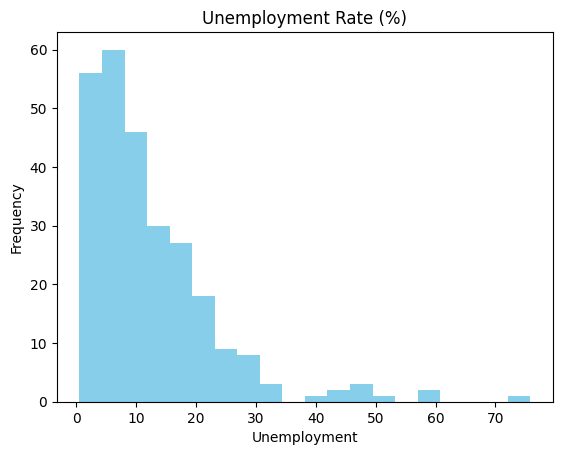

In [ ]:
plt.hist(imputed_df[' Estimated Unemployment Rate (%)'], bins=20, color='skyblue')
plt.xlabel('Unemployment')
plt.ylabel('Frequency')
plt.title('Unemployment Rate (%)')
plt.show()

In [ ]:
da={' Date'}
c= imputed_df.drop(da, axis=1)
c.corr()

,Region,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
Region,1.000000,NaN,-0.020823,0.234531,0.197804,-0.201465,0.009293,0.145440
Frequency,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Estimated Unemployment Rate (%),-0.020823,NaN,1.000000,-0.245176,-0.073540,-0.236189,0.149976,-0.023976
Estimated Employed,0.234531,NaN,-0.245176,1.000000,-0.047948,0.018463,-0.113664,-0.119321
Estimated Labour Participation Rate (%),0.197804,NaN,-0.073540,-0.047948,1.000000,0.085358,0.080372,0.397836
Region.1,-0.201465,NaN,-0.236189,0.018463,0.085358,1.000000,-0.593279,-0.337161
longitude,0.009293,NaN,0.149976,-0.113664,0.080372,-0.593279,1.000000,0.125895
latitude,0.145440,NaN,-0.023976,-0.119321,0.397836,-0.337161,0.125895,1.000000


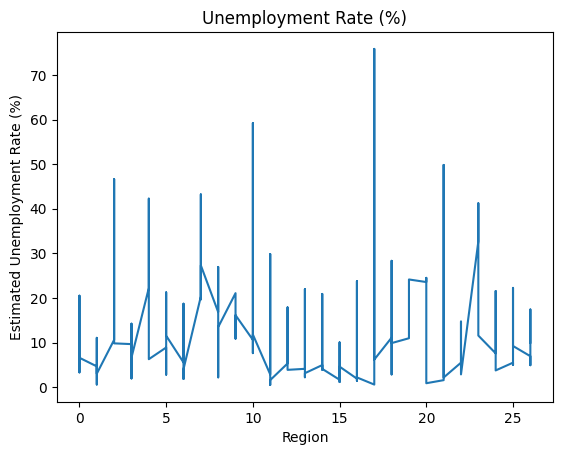

In [ ]:
plt.plot(c['Region'],c[' Estimated Unemployment Rate (%)'])
plt.xlabel('Region')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate (%)')
plt.show()

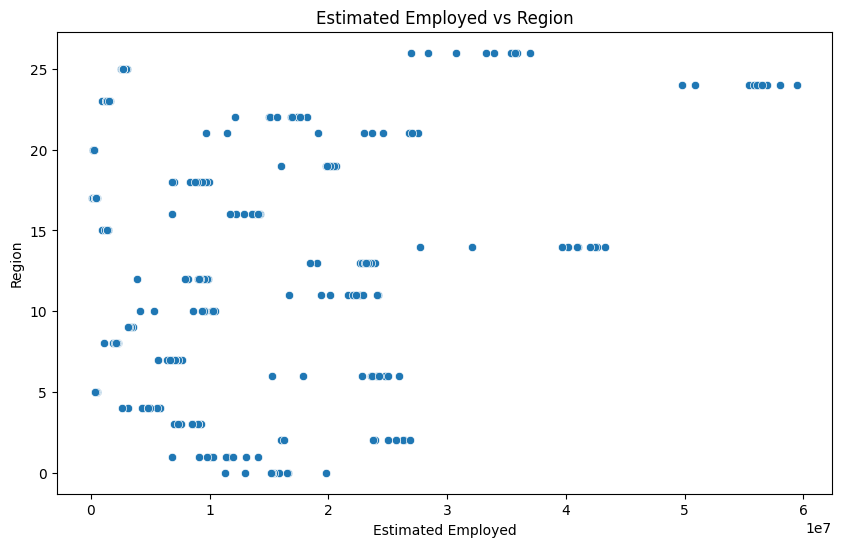

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=' Estimated Employed', y='Region', data=c)
plt.xlabel('Estimated Employed')
plt.ylabel('Region')
plt.title('Estimated Employed vs Region')
plt.show()


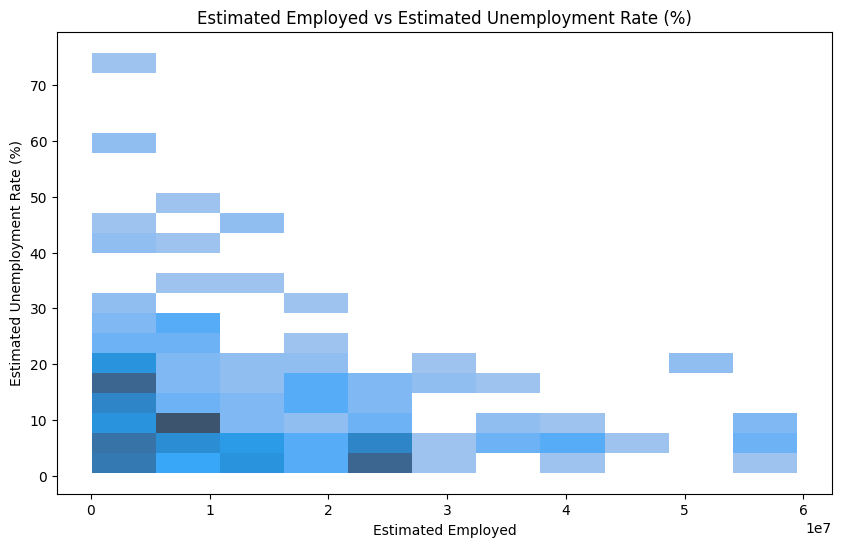

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(x=' Estimated Employed', y=' Estimated Unemployment Rate (%)', data=c)
plt.xlabel('Estimated Employed')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Estimated Employed vs Estimated Unemployment Rate (%)')
plt.show()


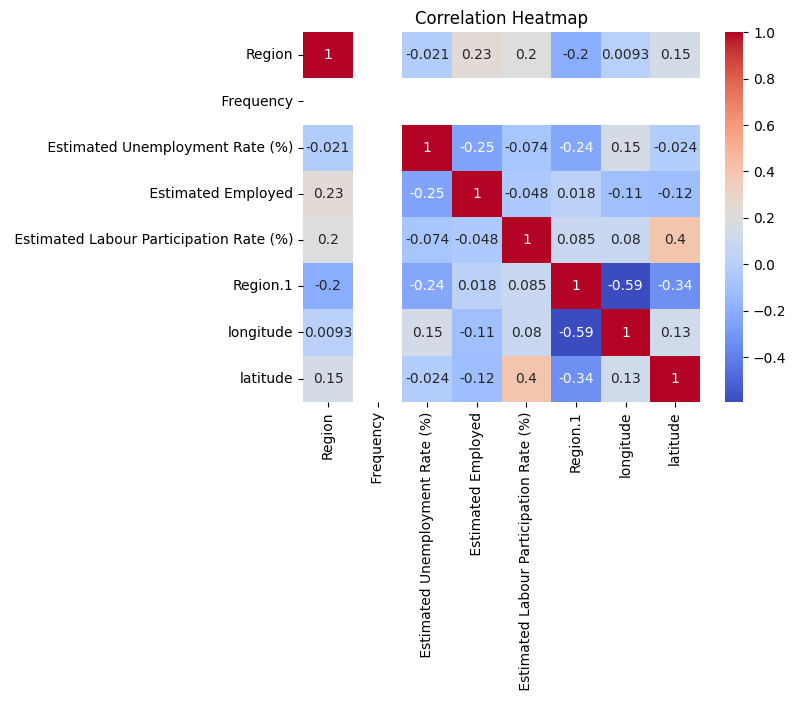

In [ ]:
import seaborn as sns
sns.heatmap(c.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()